In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
!yolo predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

100% 6.23M/6.23M [00:00<00:00, 129MB/s]
Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 13.2MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 412.5ms
Speed: 17.9ms preprocess, 412.5ms inference, 30.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


##Object Detection on Custom Data using YOLOV8

In [ ]:
%pwd


'/content/drive/MyDrive/Colab Notebooks/YoloV8'

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/YoloV8/

/content/drive/My Drive/Colab Notebooks/YoloV8


In [ ]:
!ls

data  data.yaml  Yolo_V8.ipynb


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

In [ ]:
!ls runs/detect/train2

args.yaml					    P_curve.png		train_batch121.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch122.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1700672214.f541929d6149.5213.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch120.jpg	weights


In [ ]:
!ls runs/detect/train2/weights

best.pt  last.pt


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/YoloV8'

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.99it/s]
                   all         31        101      0.802      0.801      0.832      0.484
                Helmet         31         18      0.936          1      0.995      0.707
               Goggles         31          9       0.56      0.444      0.548      0.225
                Jacket         31         14      0.749      0.857      0.847      0.552
                Gloves         31         52      0.769      0.703      0.775      0.418
              Footwear         31          8      0.998          1      0.995      0.517
Speed: 0.2ms

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=datasets/data/test/images

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/test/images/1.jpeg: 192x224 1 Helmet, 1 Goggles, 2 Glovess, 61.8ms
image 2/31 /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/test/images/10.jpeg: 160x224 3 Glovess, 69.2ms
image 3/31 /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/test/images/11.jpeg: 224x224 2 Glovess, 9.6ms
image 4/31 /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/test/images/12.jpeg: 192x224 2 Glovess, 9.1ms
image 5/31 /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/test/images/13.jpeg: 128x224 1 Gloves, 89.2ms
image 6/31 /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/test/images/14(1).jpeg: 224x224 1 Jacket, 9.9ms
image 7/31 /content/drive/MyDrive/Colab Notebooks/YoloV8/datasets/data/test/images/14.jpg: 192x224 2 Hel

In [ ]:
import glob
from IPython.display import display,Image

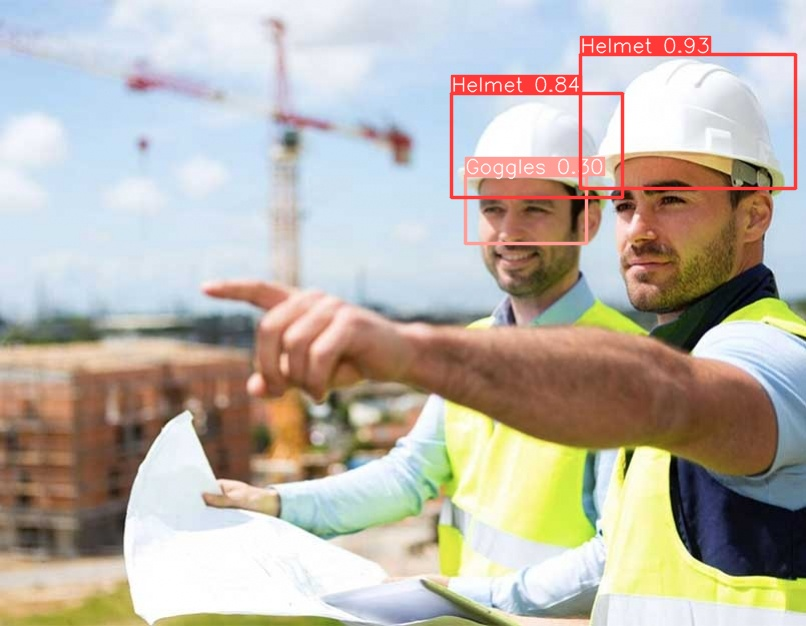

In [ ]:
for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path,width=600))

## Object Segmentation on Custom Data using YOLO_V8

In [2]:
%cd /content/drive/My Drive/Colab Notebooks/YoloV8/

/content/drive/My Drive/Colab Notebooks/YoloV8


In [5]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data2.yaml epochs=10 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 121MB/s] 
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data2.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=

In [7]:
#Validation Custom Model
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data2.yaml

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/YoloV8/cell_data/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  5.02it/s]
                   all          2         26      0.372      0.269      0.274      0.219      0.434      0.308      0.306      0.216
Speed: 4.0ms preprocess, 78.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=cell_data/test/images save=true

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/2 /content/drive/MyDrive/Colab Notebooks/YoloV8/cell_data/test/images/cell_00001_label_png.rf.ce2b953c17ff50f238545352f989b729.jpg: 640x640 4 cells, 20.9ms
image 2/2 /content/drive/MyDrive/Colab Notebooks/YoloV8/cell_data/test/images/cell_00002_label_png.rf.1b0ec78b3fd99931eecac5cc31cdaa3c.jpg: 640x640 4 cells, 20.9ms
Speed: 2.1ms preprocess, 20.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


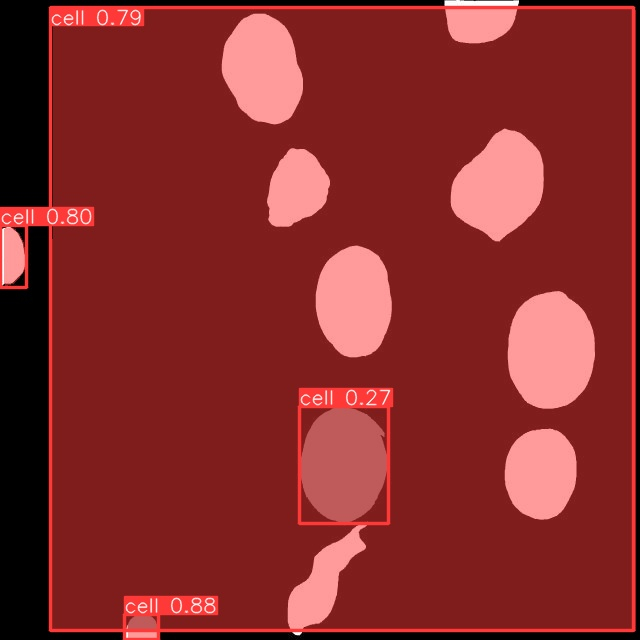

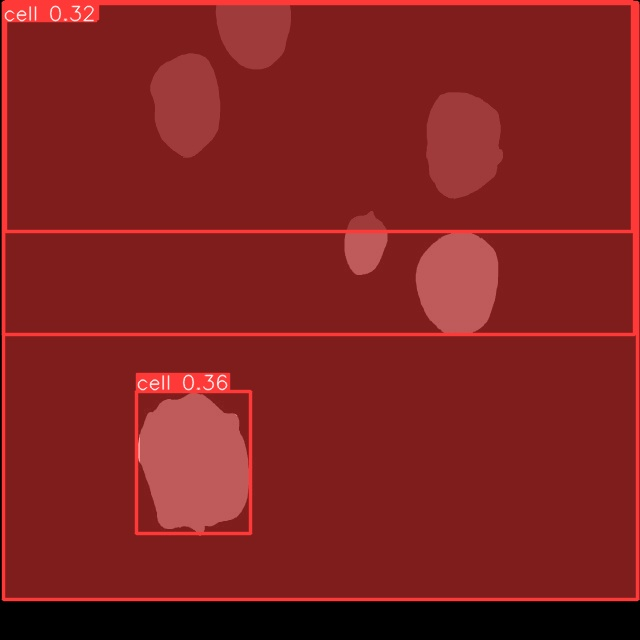

In [9]:
import glob
from IPython.display import display,Image


for image_path in glob.glob('runs/segment/predict/*.jpg')[:3]:
  display(Image(filename=image_path,width=600))
  print("\n")